<a href="https://colab.research.google.com/github/Arpit-Singh-Graviton/Arpit-Singh-Graviton/blob/main/30_empirical_ecosys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
f=open("GraphWeb2.txt")

In [4]:
edges=f.read()
edges=edges[1:] #to skip the space in starting

In [5]:
edge_string=list(edges.split("\n "))
#print(edge_string)
edge_list=list()
for string in edge_string:
    tup=tuple(map(int,string.split(" ")))
    edge_list.append(tup)
print(edge_list)
G=nx.DiGraph()
G.add_edges_from(edge_list)

[(30, 30), (17, 30), (21, 30), (1, 30), (2, 30), (7, 30), (10, 30), (11, 30), (15, 30), (16, 30), (9, 30), (14, 30), (20, 30), (6, 30), (3, 30), (24, 30), (12, 30), (8, 30), (17, 5), (21, 5), (4, 5), (13, 5), (15, 5), (16, 5), (14, 5), (27, 5), (3, 5), (24, 5), (12, 5), (30, 19), (17, 19), (21, 19), (1, 19), (11, 19), (15, 19), (16, 19), (14, 19), (28, 19), (20, 19), (24, 19), (12, 19), (8, 19), (22, 17), (13, 17), (26, 17), (20, 17), (18, 17), (27, 17), (17, 21), (21, 21), (22, 21), (4, 21), (2, 21), (7, 21), (22, 1), (4, 1), (13, 1), (2, 1), (7, 1), (9, 1), (28, 1), (20, 1), (8, 1), (22, 23), (22, 22), (23, 4), (25, 4), (26, 4), (14, 4), (20, 4), (18, 4), (4, 25), (26, 25), (23, 13), (25, 13), (26, 13), (11, 13), (20, 13), (25, 26), (13, 26), (2, 26), (18, 26), (23, 2), (22, 2), (4, 2), (13, 2), (26, 2), (2, 2), (14, 2), (28, 2), (18, 2), (22, 7), (4, 7), (25, 7), (26, 7), (2, 7), (28, 7), (18, 7), (4, 10), (2, 10), (18, 10), (23, 11), (25, 11), (13, 11), (26, 11), (2, 11), (10, 11),

In [6]:
N=G.number_of_nodes()
l=G.number_of_edges()
C=(2*l)/(N*N)
print("\n Num of Nodes=",N)
print("\n Num of links=",l)
print("\n Connectance=",C)


 Num of Nodes= 30

 Num of links= 229

 Connectance= 0.5088888888888888


In [21]:
sp=[]
sp=0
def keys(ks):
  SEED = 3
  np.random.seed(SEED)
  def f(x,t,r,k,A):
      dx=np.empty(N)
      for i in range(N):
        if x[i]<0.0:
          x[i]=0
          dx[i]=0
        else:
          dx[i]=r[i]
          for j in range(N):
            dx[i]+=r[i]*A[j,i]*x[j]/k[i]
          dx[i]*=x[i]
      return dx

  t=np.linspace(0,1000,num=1000)


  #Random Initial Population
  x0=np.ones(N)*10 #random.uniform(low=10.0, high=100.0, size=N)
  x0[ks]=0
  #Random Growth Rates
  r=np.ones(N)#uniform(low=0.0, high=1.0, size=N)
  k=np.random.uniform(low=50.0,high=500.0,size=N) #carrying capacity-goes to diognals

  #Random Interaction Magnitude-fixed structure
  w=abs(np.random.normal(0.1,0.01,l))
  #print(np.mean(w))
  Amaster=np.zeros((N,N))
  count=0
  for (i,j) in edge_list:
    #if i!=j:
      eff=np.random.rand(1)
      Amaster[j-1,i-1]=-w[count]
      Amaster[i-1,j-1]=eff*w[count]
      count+=1
  for i in range(N):
    Amaster[i,i]=-1
  #print(A1)

  #Random Initial Population  
  x1=odeint(f,x0,t,args=(r,k,Amaster))
  
  xf1=x1[999,:]
  maximum = np.max(xf1)
  minimum = np.min(xf1)

  count=0
  for i in range(N):
    if xf1[i]>1:
      count=count+1
  sp.append(count)
  print(sp)
  print("Surviving Species",count)
  print(x1[999,:])

In [22]:
ss=[]
ss=0
for itr in range(N):
  keys(itr)

[24]
Surviving Species 24
[-4.61971131e-15  2.77656278e+02  1.78556496e+01  1.56274438e+02
  5.21636764e+02  3.32691732e+02 -2.75121079e-12  6.44857180e+01
 -3.17867848e-21  1.19091219e+02 -1.28779557e-12  2.80014999e+02
  1.82650611e+02 -2.96135144e-10  3.29539271e+02  9.95182023e+01
 -7.54795001e-17  1.33412213e+02  2.42842530e+02  1.10113480e+02
  7.69782140e+00  2.22349821e+02  1.78909039e+02  2.39481006e+01
  1.77960311e+02  2.87023669e+02  8.02380602e+01  1.82541791e+01
  3.40424934e+02  4.49840826e+02]
[24, 24]
Surviving Species 24
[ 1.88971752e+02 -1.02214718e-08  2.08515739e+01  1.68843239e+02
  5.22892617e+02  3.36556181e+02 -3.99808348e-24  4.86426747e+01
 -9.08467183e-13  1.08585055e+02 -1.23983667e-24  2.89286270e+02
  1.93636347e+02 -9.70804191e-20  3.27682824e+02  1.01729449e+02
 -1.18057856e-13  1.56668194e+02  2.41718354e+02  9.28105152e+01
  9.67576601e+00  2.28610597e+02  2.05267591e+02  8.66762034e+00
  1.77998451e+02  3.15166057e+02  7.97029452e+01  4.00938448e+01


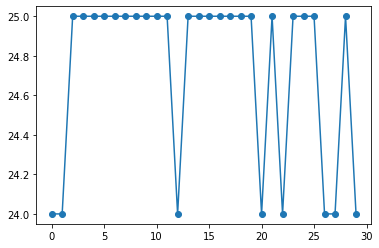

In [27]:
plt.plot(sp,'-o')